# Analyzing Credit Card Fraud with Machine Learning
Capstone Project by Jeffrey Romero

# Project Description

Required Python dependencies:
- pip
    - https://pip.pypa.io/en/stable/installation/
- numpy
    - \$ pip install numpy
- pandas
    - \$ pip install pandas
- seaborn
    - \$ pip install seaborn
- scipy
    - \$ pip install scipy
- scikit-learn
    - \$ pip install -U scikit-learn
- matplotlib
    - \$ pip install -U matplotlib
- imbalanced-learn
    - \$ pip install -U imbalanced-learn

In [1]:
import warnings, requests, zipfile, io
warnings.simplefilter('ignore')
import numpy
import pandas as pd
import seaborn
from scipy.io import arff
from sklearn.preprocessing import LabelEncoder
import time

# Model training, testing, and evaluation
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from collections import Counter
from imblearn.over_sampling import RandomOverSampler, SMOTE

# Custom modules
import functions.functions as functions

In [2]:
# Everytime the data set is displayed it will include up to 200 rows and columns
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [3]:
data_frame = None
data_frame = pd.DataFrame(pd.read_csv('./application_data.csv'))

In [4]:
data_frame_copy = data_frame.copy()

# Machine Learning Pipeline: Data evaluation & Feature engineering

In [5]:
def print_size(df):
    '''
    Print the number of rows and columns in the dataframe if it exists.
    
    Parameters:
        df (pandas.DataFrame): Two-dimensional, size-mutable, potentially heterogeneous tabular data.
    '''
    if not df.empty:
        df_size = df.shape
        print('Data table total rows & columns\nRows: ' + str(df_size[0]) + '\nColumns: ' + str(df_size[1]))

def print_columns(df):
    '''
    Print every column label in the dataframe if it exists.
    
    Parameters:
        df (pandas.DataFrame): Two-dimensional, size-mutable, potentially heterogeneous tabular data.
    '''
    if not df.empty:
        print(f'The data set contains {len(df.columns)} columns.')
        if len(df.columns) > 0:
            print('The data set\'s columns are labeled accordingly:')
            for col in df.columns:
                print(col)

def data_frame_contains_nulls(df):
    '''
    Print the column labels which contain null values and how many null values there are.
    
    Parameters:
        df (pandas.DataFrame): Two-dimensional, size-mutable, potentially heterogeneous tabular data.
        
    Returns:
        True (bool): If there are null values found within df.
        False (bool): If there are no null values within df.
    '''
    if not df.empty:
        highest_null_count = df.isnull().sum().max()
        if highest_null_count == 0:
            print('No null values within the data table.')
            return False
        else:
            print('There are null values within this data table. Below are the columns/features and the amount of null values they contain.\n')
            null_values = df.isnull().sum().sort_values(ascending=False)
            print(null_values[null_values>0]) # Print the columns which contain at least 1 null value
            return True

def print_null_value_percentage(df):
    '''
    Print the column labels which contain null values and the percentage of null values in that column.
    
    Parameters:
        df (pandas.DataFrame): Two-dimensional, size-mutable, potentially heterogeneous tabular data.
    '''
    if not df.empty:
        highest_null_count = df.isnull().sum().max()
        if highest_null_count > 0:
            null_value_percent = 100 * df.isnull().sum()/len(df)
            print(null_value_percent[null_value_percent>=50])
        else:
            print('No null values within the data table.')

def print_datatype_count(df, datatype):
    '''
    Print the column labels which contain values of a queried data type (such as: int, float, object).
    
    Parameters:
        df (pandas.DataFrame): Two-dimensional, size-mutable, potentially heterogeneous tabular data.
        datatype (String): Queried data type. (Ex: 'object', 'float', or 'int').
    '''
    if not df.empty and (datatype == 'object' or datatype == 'float' or datatype == 'int'):
        print('There are ' + str(numpy.count_nonzero(df.select_dtypes(datatype).columns)) + ' columns with the ' + datatype + ' data type:')
        print(df.select_dtypes(datatype).columns)

def fill_missing_float_values(df):
    '''
    Use an interpolation method (Ex: linear interpolation) to fill in missing float values in a column.
    
    Parameters:
        df (pandas.DataFrame): Two-dimensional, size-mutable, potentially heterogeneous tabular data.
    '''
    if not df.empty:
        cols_to_fill = df.select_dtypes('float').columns
        start = int(time.time())
        for i in cols_to_fill:
            df[i] = df[i].interpolate(method='linear', limit_direction='forward')
        end = int(time.time())
        print('Duration ' + str(end - start ) + ' seconds')

def print_model_statistics(model):
    '''
    Print out statistics for a trained Machine Learning model.
    
    Parameters:
        model (TrainedModel): Trained Machine Learning model. See TrainedModel.__doc__ for more information.
    '''
    if model:
        print(model.name + ' accuracy score: ' + str(model.testing_accuracy))
        minute = int(model.trainingtime / 60)
        second = int(model.trainingtime % 60)
        print('Training time: ' + str(minute) + 'm' + str(second) + 's')
    else:
        print('ML Model does not exist.')
    
def print_column_description(df, colname):
    '''
    Print the description of a queried column label (Ex: print_column_description(data_frame, 'TARGET')).
    
    Parameters:
        df (pandas.DataFrame): Two-dimensional, size-mutable, potentially heterogeneous tabular data.
        colname (String): Queried column/feature name. (Ex: 'TARGET')
    '''
    if not df.empty:
        if len(colname) > 0 and colname in df:
            print(colname + ':\n' + functions.column_descriptions[colname])
        else:
            print(colname + ' is not in the data table.')
    else:
        print('Data table does not exist.')

In [6]:
print_size(data_frame)

Data table total rows & columns
Rows: 307511
Columns: 122


In [7]:
print_columns(data_frame)

The data set contains 122 columns.
The data set's columns are labeled accordingly:
SK_ID_CURR
TARGET
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG


In [8]:
num_of_rows = 15
data_frame.head(num_of_rows)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0000,0.000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0000,0.000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [9]:
data_frame.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [10]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [11]:
data_frame.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


## Identifying and removing null values

In [12]:
data_frame_contains_nulls(data_frame_copy)

There are null values within this data table. Below are the columns/features and the amount of null values they contain.

COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAPARTMENTS_MEDI        213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
LIVINGAPARTMENTS_MEDI           210199
FLOORSMIN_AVG                   208642
FLOORSMIN_MODE                  208642
FLOORSMIN_MEDI                  208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_MODE                204488
YEARS_BUILD_AVG                 204488
OWN_CAR_AGE                     202929
LANDAREA_MEDI                   182590
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE   

True

In [13]:
print_null_value_percentage(data_frame_copy)

OWN_CAR_AGE                 65.990810
EXT_SOURCE_1                56.381073
APARTMENTS_AVG              50.749729
BASEMENTAREA_AVG            58.515956
YEARS_BUILD_AVG             66.497784
COMMONAREA_AVG              69.872297
ELEVATORS_AVG               53.295980
ENTRANCES_AVG               50.348768
FLOORSMIN_AVG               67.848630
LANDAREA_AVG                59.376738
LIVINGAPARTMENTS_AVG        68.354953
LIVINGAREA_AVG              50.193326
NONLIVINGAPARTMENTS_AVG     69.432963
NONLIVINGAREA_AVG           55.179164
APARTMENTS_MODE             50.749729
BASEMENTAREA_MODE           58.515956
YEARS_BUILD_MODE            66.497784
COMMONAREA_MODE             69.872297
ELEVATORS_MODE              53.295980
ENTRANCES_MODE              50.348768
FLOORSMIN_MODE              67.848630
LANDAREA_MODE               59.376738
LIVINGAPARTMENTS_MODE       68.354953
LIVINGAREA_MODE             50.193326
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAREA_MODE          55.179164
APARTMENTS_M

In [14]:
print_datatype_count(data_frame_copy, 'object')

There are 16 columns with the object data type:
Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')


In [15]:
occupation_type_null_count = data_frame_copy['OCCUPATION_TYPE'].isnull().sum()
print('There are ' + str(occupation_type_null_count) + ' null values in the OCCUPATION_TYPE column.')

There are 96391 null values in the OCCUPATION_TYPE column.


<AxesSubplot:>

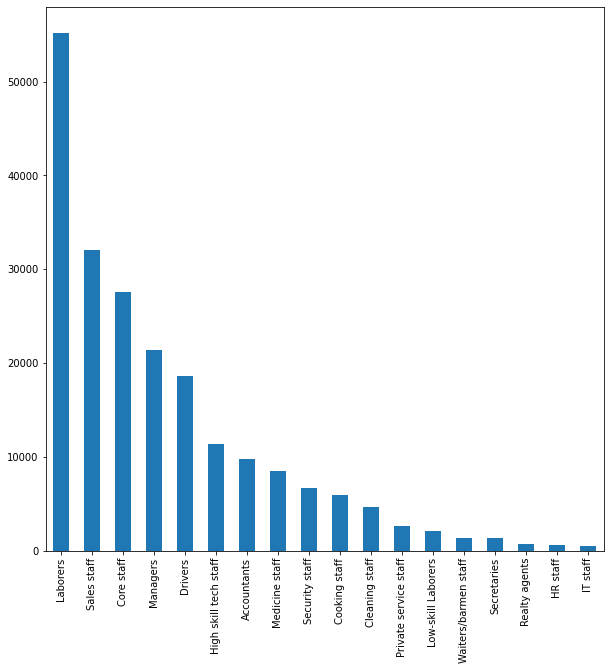

In [16]:
data_frame_copy['OCCUPATION_TYPE'].value_counts().plot(kind='bar', figsize=(10,10))

In [17]:
null_jobs = data_frame_copy[data_frame_copy['OCCUPATION_TYPE'].isnull()]
null_jobs['TARGET'].value_counts()

0    90113
1     6278
Name: TARGET, dtype: int64

In [18]:
data_frame_copy[data_frame_copy['OCCUPATION_TYPE'] == 'Laborers']['TARGET'].value_counts()

0    49348
1     5838
Name: TARGET, dtype: int64

In [19]:
data_frame_copy['OCCUPATION_TYPE'] = data_frame_copy['OCCUPATION_TYPE'].fillna('Unidentified')
data_frame_filled_jobs = data_frame_copy.copy()
data_frame_filled_jobs['OCCUPATION_TYPE'].value_counts()

Unidentified             96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

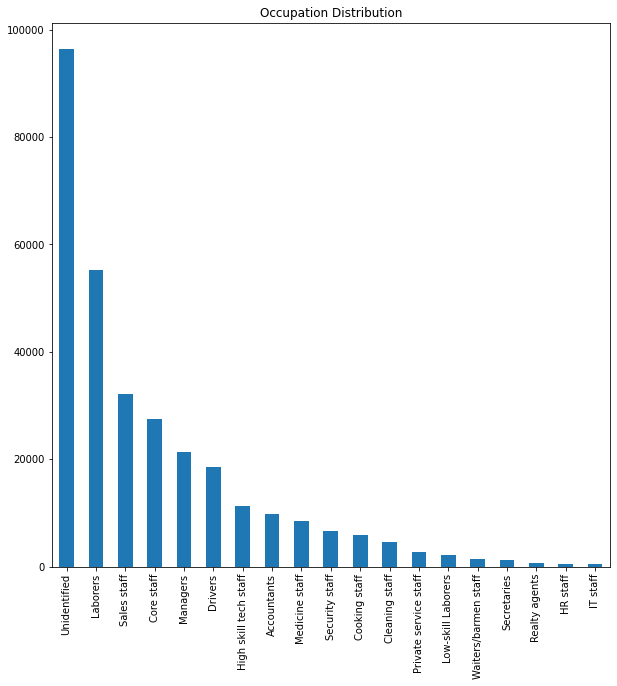

In [20]:
plt.figure(figsize=(10,10))
occupation_distribution = data_frame_filled_jobs['OCCUPATION_TYPE'].value_counts()
fig = occupation_distribution.plot.bar()
fig.set_title('Occupation Distribution')
plt.show()

In [21]:
data_frame_copy = data_frame_filled_jobs.copy()

In [22]:
del data_frame_filled_jobs

In [23]:
occupation_type_null_count = data_frame_copy['OCCUPATION_TYPE'].isnull().sum()
print('There are ' + str(occupation_type_null_count) + ' null values in the OCCUPATION_TYPE column.')

There are 0 null values in the OCCUPATION_TYPE column.


In [24]:
def fill_missing_values_with_mode(df, col):
    null_count_in_col = df[col].isnull().sum()
    if null_count_in_col > 0:
        print('Filling in null values in the column ' + col + ' with the mode value.')
        return df[col].fillna(df[col].mode()[0])
    else:
        print('No null values are present in the column ' + col + '.')

In [25]:
'''
Columns to fill missing string values:

FONDKAPREMONT_MODE
WALLSMATERIAL_MODE
HOUSETYPE_MODE
EMERGENCYSTATE_MODE
OCCUPATION_TYPE - Already filled in missing values
NAME_TYPE_SUITE
'''

data_frame_copy['FONDKAPREMONT_MODE'] = fill_missing_values_with_mode(data_frame_copy, 'FONDKAPREMONT_MODE')
data_frame_copy['WALLSMATERIAL_MODE'] = fill_missing_values_with_mode(data_frame_copy, 'WALLSMATERIAL_MODE')
data_frame_copy['HOUSETYPE_MODE'] = fill_missing_values_with_mode(data_frame_copy, 'HOUSETYPE_MODE')
data_frame_copy['EMERGENCYSTATE_MODE'] = fill_missing_values_with_mode(data_frame_copy, 'EMERGENCYSTATE_MODE')
data_frame_copy['NAME_TYPE_SUITE'] = fill_missing_values_with_mode(data_frame_copy, 'NAME_TYPE_SUITE')

# Verify that there are no more null values within each string column
if data_frame_contains_nulls(data_frame_copy.select_dtypes('object')): # Prevent the boolean return from printing
    pass 

Filling in null values in the column FONDKAPREMONT_MODE with the mode value.
Filling in null values in the column WALLSMATERIAL_MODE with the mode value.
Filling in null values in the column HOUSETYPE_MODE with the mode value.
Filling in null values in the column EMERGENCYSTATE_MODE with the mode value.
Filling in null values in the column NAME_TYPE_SUITE with the mode value.
No null values within the data table.


## Fill in missing integer values

In [26]:
data_frame_contains_nulls(data_frame_copy.select_dtypes('int'))

No null values within the data table.


False

## Data Visualization

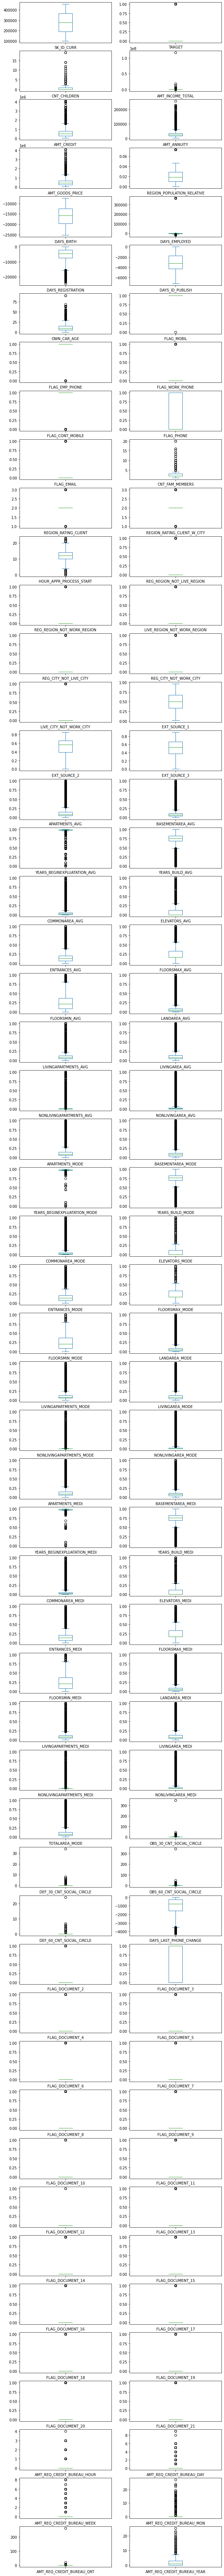

In [27]:
'''
Parameters:
kind - Which plot to use (ex: line, bar, histogram, scatter plot, ...)
subplots - Each column will have its own individual plot
figsize - Tuple of width and height in inches
'''
data_frame_copy.plot(kind='box', subplots=True, layout=(61,2), sharex=False, sharey=False, figsize=(10,150))
plt.show()

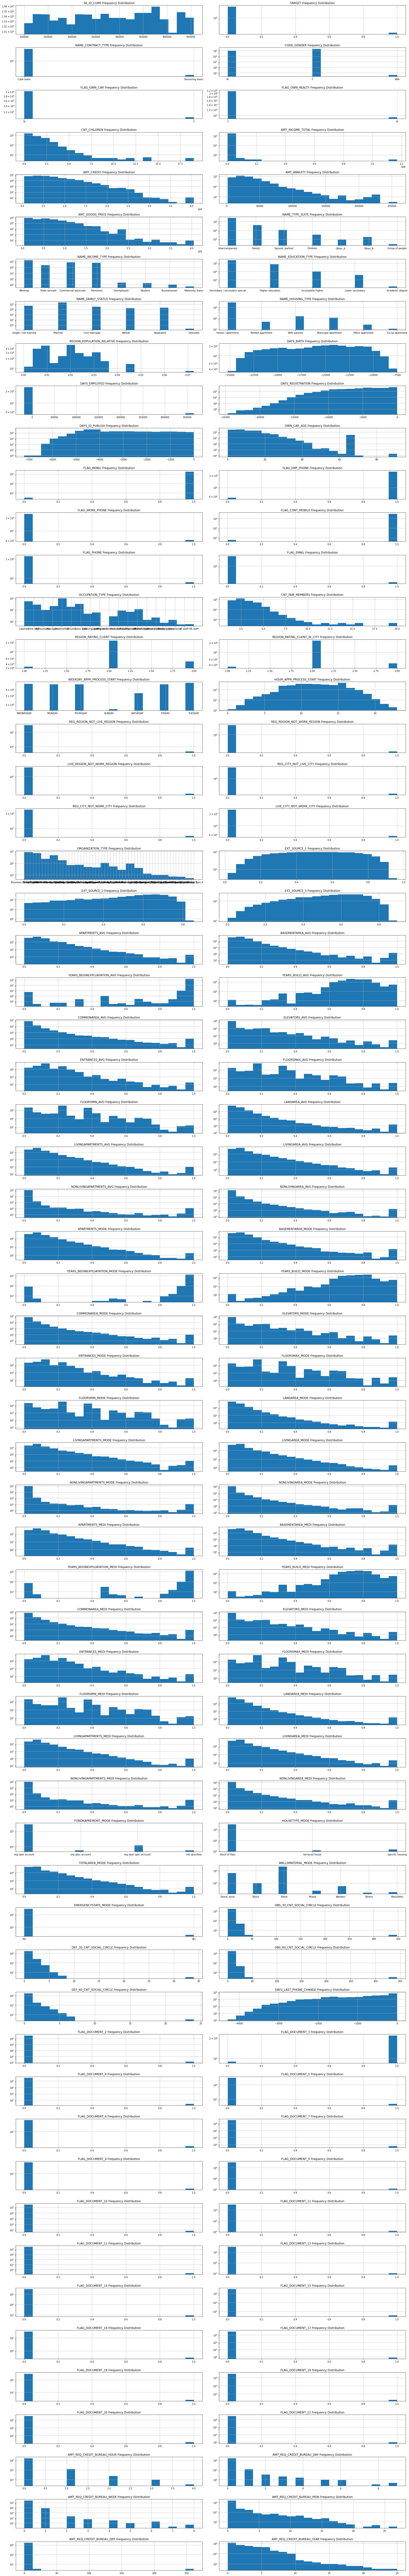

In [28]:
def draw_histograms(df, features, rows, columns):
    fig = plt.figure(figsize=(24,150))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows, columns, i+1)
        df[feature].hist(bins=20, ax=ax)
        ax.set_title(feature + ' Frequency Distribution')
        ax.set_yscale('log')
    fig.tight_layout()
    plt.show()

draw_histograms(data_frame_copy, data_frame_copy.columns, 61, 2)

In [29]:
for i in range(20):
    functions.print_column_description('FLAG_DOCUMENT_' + str(i + 2))

FLAG_DOCUMENT_2:
Did client provide document 2

FLAG_DOCUMENT_3:
Did client provide document 3

FLAG_DOCUMENT_4:
Did client provide document 4

FLAG_DOCUMENT_5:
Did client provide document 5

FLAG_DOCUMENT_6:
Did client provide document 6

FLAG_DOCUMENT_7:
Did client provide document 7

FLAG_DOCUMENT_8:
Did client provide document 8

FLAG_DOCUMENT_9:
Did client provide document 9

FLAG_DOCUMENT_10:
Did client provide document 10

FLAG_DOCUMENT_11:
Did client provide document 11

FLAG_DOCUMENT_12:
Did client provide document 12

FLAG_DOCUMENT_13:
Did client provide document 13

FLAG_DOCUMENT_14:
Did client provide document 14

FLAG_DOCUMENT_15:
Did client provide document 15

FLAG_DOCUMENT_16:
Did client provide document 16

FLAG_DOCUMENT_17:
Did client provide document 17

FLAG_DOCUMENT_18:
Did client provide document 18

FLAG_DOCUMENT_19:
Did client provide document 19

FLAG_DOCUMENT_20:
Did client provide document 20

FLAG_DOCUMENT_21:
Did client provide document 21



In [30]:
# Delete these columns because they provide meaningless data
cols_to_del = [
    'FLAG_DOCUMENT_2', 
    'FLAG_DOCUMENT_3', 
    'FLAG_DOCUMENT_4', 
    'FLAG_DOCUMENT_5', 
    'FLAG_DOCUMENT_6', 
    'FLAG_DOCUMENT_7', 
    'FLAG_DOCUMENT_8', 
    'FLAG_DOCUMENT_9', 
    'FLAG_DOCUMENT_10', 
    'FLAG_DOCUMENT_11', 
    'FLAG_DOCUMENT_12', 
    'FLAG_DOCUMENT_13', 
    'FLAG_DOCUMENT_14', 
    'FLAG_DOCUMENT_15', 
    'FLAG_DOCUMENT_16', 
    'FLAG_DOCUMENT_17', 
    'FLAG_DOCUMENT_18', 
    'FLAG_DOCUMENT_19', 
    'FLAG_DOCUMENT_20', 
    'FLAG_DOCUMENT_21', 
]

In [31]:
data_frame_less_useless_columns = data_frame_copy.copy() # Not in place
data_frame_less_useless_columns = data_frame_less_useless_columns.drop(columns=cols_to_del)
print_size(data_frame_less_useless_columns)

Data table total rows & columns
Rows: 307511
Columns: 102


In [32]:
print_columns(data_frame_less_useless_columns)

The data set contains 102 columns.
The data set's columns are labeled accordingly:
SK_ID_CURR
TARGET
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG


In [33]:
data_frame_copy = data_frame_less_useless_columns.copy()
del data_frame_less_useless_columns

In [34]:
df_with_abs_values = data_frame_copy.copy()

df_with_abs_values[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']] = df_with_abs_values[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']].abs()

df_with_abs_values[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0,9461,637,3648.0,2120
1,16765,1188,1186.0,291
2,19046,225,4260.0,2531
3,19005,3039,9833.0,2437
4,19932,3038,4311.0,3458
...,...,...,...,...
307506,9327,236,8456.0,1982
307507,20775,365243,4388.0,4090
307508,14966,7921,6737.0,5150
307509,11961,4786,2562.0,931


In [35]:
data_frame_copy = df_with_abs_values.copy()
del df_with_abs_values

In [36]:
data_frame_copy['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

## Fixing out of place value

In [37]:
data_frame_copy[data_frame_copy['CODE_GENDER']=='XNA']

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
35657,141289,0,Revolving loans,XNA,Y,Y,0,207000.0,382500.0,19125.0,337500.0,Unaccompanied,Working,Secondary / secondary special,Married,Municipal apartment,0.020713,20232,10044,10024.0,3537,13.0,1,1,1,1,1,0,Unidentified,2.0,3,3,TUESDAY,10,0,0,0,0,0,0,Business Entity Type 1,NaN,0.295998,0.461482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,reg oper account,block of flats,NaN,Panel,No,0.0,0.0,0.0,0.0,-286.0,0.0,0.0,0.0,0.0,0.0,1.0
38566,144669,0,Revolving loans,XNA,N,Y,2,157500.0,270000.0,13500.0,225000.0,Family,Working,Secondary / secondary special,Married,House / apartment,0.026392,13717,2797,2241.0,4659,NaN,1,1,1,1,1,0,Low-skill Laborers,4.0,2,2,FRIDAY,16,0,0,0,0,0,0,Industry: type 3,NaN,0.709205,0.310818,0.0165,0.0368,0.9811,NaN,NaN,0.0,0.0690,0.0417,NaN,0.0233,NaN,0.0115,NaN,0.0000,0.0168,0.0382,0.9811,NaN,NaN,0.0,0.0690,0.0417,NaN,0.0238,NaN,0.0120,NaN,0.0000,0.0167,0.0368,0.9811,NaN,NaN,0.0,0.0690,0.0417,NaN,0.0237,NaN,0.0117,NaN,0.000,reg oper account,block of flats,0.0090,"Stone, brick",No,0.0,0.0,0.0,0.0,-493.0,0.0,0.0,0.0,3.0,0.0,4.0
83382,196708,0,Revolving loans,XNA,N,Y,1,135000.0,405000.0,20250.0,225000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.035792,10647,1228,183.0,1671,NaN,1,1,1,1,1,0,Core staff,3.0,2,2,THURSDAY,15,0,0,0,0,0,0,Kindergarten,0.404970,0.659185,0.076984,0.0773,0.1353,0.9921,0.8912,NaN,0.0,0.1379,0.1667,0.0417,NaN,0.0630,0.0621,0.0000,NaN,0.0788,0.1404,0.9921,0.8955,NaN,0.0,0.1379,0.1667,0.0417,NaN,0.0689,0.0647,0.0000,NaN,0.0781,0.1353,0.9921,0.8927,NaN,0.0,0.1379,0.1667,0.0417,NaN,0.0641,0.0632,0.0000,NaN,reg oper spec account,block of flats,0.0769,Panel,No,7.0,1.0,7.0,1.0,-851.0,0.0,0.0,0.0,0.0,0.0,3.0
189640,319880,0,Revolving loans,XNA,Y,Y,0,247500.0,540000.0,27000.0,900000.0,Unaccompanied,Commercial associate,Incomplete higher,Civil marriage,House / apartment,0.035792,9649,2293,4099.0,2326,8.0,1,1,1,1,1,0,Unidentified,2.0,2,2,FRIDAY,15,0,0,0,0,0,0,Medicine,0.653035,0.658620,0.360613,0.0278,0.0555,0.9712,0.6056,0.

In [38]:
code_gender_mode = data_frame_copy.mode()['CODE_GENDER'][0]
code_gender_mode

'F'

In [39]:
df_with_fixed_vals = data_frame_copy.copy()

In [40]:
# For each value in the CODE_GENDER column, replace with the current gender mode if the value is 'XNA'
df_with_fixed_vals['CODE_GENDER'] = df_with_fixed_vals['CODE_GENDER'].apply(lambda x : code_gender_mode if x == 'XNA' else x)

In [41]:
data_frame_copy = df_with_fixed_vals.copy()
del df_with_fixed_vals
data_frame_copy['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

## Fill in missing float values through interpolation

In [42]:
print_datatype_count(data_frame_copy, 'float')

There are 65 columns with the float data type:
Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'OWN_CAR_AGE',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_ME

In [43]:
print_datatype_count(data_frame_copy, 'float')

There are 65 columns with the float data type:
Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'OWN_CAR_AGE',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_ME

In [44]:
data_frame_contains_nulls(data_frame_copy.select_dtypes('float'))

There are null values within this data table. Below are the columns/features and the amount of null values they contain.

COMMONAREA_MODE                 214865
COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_MEDI        213514
NONLIVINGAPARTMENTS_AVG         213514
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_MEDI           210199
LIVINGAPARTMENTS_AVG            210199
FLOORSMIN_MEDI                  208642
FLOORSMIN_AVG                   208642
FLOORSMIN_MODE                  208642
YEARS_BUILD_AVG                 204488
YEARS_BUILD_MEDI                204488
YEARS_BUILD_MODE                204488
OWN_CAR_AGE                     202929
LANDAREA_AVG                    182590
LANDAREA_MODE                   182590
LANDAREA_MEDI                   182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1        

True

In [45]:
# Also include the percentage of missing values
print_null_value_percentage(data_frame_copy.select_dtypes('float'))

OWN_CAR_AGE                 65.990810
EXT_SOURCE_1                56.381073
APARTMENTS_AVG              50.749729
BASEMENTAREA_AVG            58.515956
YEARS_BUILD_AVG             66.497784
COMMONAREA_AVG              69.872297
ELEVATORS_AVG               53.295980
ENTRANCES_AVG               50.348768
FLOORSMIN_AVG               67.848630
LANDAREA_AVG                59.376738
LIVINGAPARTMENTS_AVG        68.354953
LIVINGAREA_AVG              50.193326
NONLIVINGAPARTMENTS_AVG     69.432963
NONLIVINGAREA_AVG           55.179164
APARTMENTS_MODE             50.749729
BASEMENTAREA_MODE           58.515956
YEARS_BUILD_MODE            66.497784
COMMONAREA_MODE             69.872297
ELEVATORS_MODE              53.295980
ENTRANCES_MODE              50.348768
FLOORSMIN_MODE              67.848630
LANDAREA_MODE               59.376738
LIVINGAPARTMENTS_MODE       68.354953
LIVINGAREA_MODE             50.193326
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAREA_MODE          55.179164
APARTMENTS_M

In [46]:
print(fill_missing_float_values.__doc__)


    Use an interpolation method (Ex: linear interpolation) to fill in missing float values in a column.
    
    Parameters:
        df (pandas.DataFrame): Two-dimensional, size-mutable, potentially heterogeneous tabular data.
    


In [47]:
fill_missing_float_values(data_frame_copy)

Duration 3 seconds


In [48]:
data_frame_contains_nulls(data_frame_copy.select_dtypes('float'))

There are null values within this data table. Below are the columns/features and the amount of null values they contain.

OWN_CAR_AGE    2
dtype: int64


True

In [49]:
data_frame_copy['OWN_CAR_AGE'] = data_frame_copy['OWN_CAR_AGE'].interpolate(method='linear', limit_direction='both')

In [50]:
data_frame_contains_nulls(data_frame_copy.select_dtypes('float'))

No null values within the data table.


False

In [51]:
data_frame_copy.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,26.00,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.024700,0.0369,0.972200,0.6192,0.014300,0.000000,0.069000,0.083300,0.125000,0.036900,0.020200,0.019000,0.000000,0.000000,0.025200,0.038300,0.972200,0.6341,0.01440,0.000000,0.069000,0.083300,0.125000,0.037700,0.022000,0.019800,0.0,0.0,0.025000,0.0369,0.972200,0.624300,0.014400,0.000000,0.069000,0.083300,0.125000,0.037500,0.020500,0.019300,0.000000,0.000000,reg oper account,block of flats,0.014900,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,26.00,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,0.434471,0.095900,0.0529,0.985100,0.7960,0.060500,0.080000,0.034500,0.291700,0.333300,0.013000,0.077300,0.054900,0.003900,0.009800,0.092400,0.053800,0.985100,0.8040,0.04970,0.080600,0.034500,0.291700,0.333300,0.012800,0.079000,0.055400,0.0,0.0,0.096800,0.0529,0.985100,0.798700,0.060800,0.080000,0.034500,0.291700,0.333300,0.013200,0.078700,0.055800,0.003900,0.010000,reg oper account,block of flats,0.071400,Block,No,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,26.00,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.403966,0.555912,0.729567,0.094682,0.0566,0.984736,0.7909,0.060308,0.072727,0.050173,0.280336,0.336775,0.013045,0.080875,0.056982,0.003575,0.008909,0.091636,0.057733,0.984736,0.7991,0.05045,0.073273,0.050173,0.280336,0.336775,0.012891,0.083358,0.057727,0.0,0.0,0.095573,0.0566,0.984736,0.793667,0.060608,0.072727,0.050173,0.280336,0.336775,0.013245,0.082333,0.057927,0.003575,0.009091,reg oper accou

## Visualizations - Correlation Matrix

In [52]:
def color_code(value):
    if value < 0:
        color = 'red'
    elif value == 1:
        color = 'gray'
    elif value >= 0.75:
        color = 'green'
    else:
        color = 'gray'
    return 'color: %s' % color

In [53]:
data_frame_copy.select_dtypes('float').corr().style.applymap(color_code)

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,OWN_CAR_AGE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
AMT_INCOME_TOTAL,1.000000,0.156870,0.191654,0.159579,0.074796,-0.027805,-0.026505,0.016341,0.019347,0.060874,-0.027184,0.026665,0.012384,0.004476,0.006547,0.013675,0.033713,0.004892,0.046022,0.024548,-0.000877,0.018643,0.030778,0.005970,0.016631,0.023284,0.009294,0.003999,0.005608,0.011567,0.030772,0.002315,0.044156,0.023197,-0.002158,0.016310,0.027133,0.005178,0.013648,0.026098,0.011743,0.004513,0.006479,0.013440,0.033082,0.004489,0.045598,0.024296,-0.000961,0.018265,0.030268,0.005714,0.015792,0.032820,-0.013009,-0.013255,-0.012934,-0.013128,-0.018585,0.000745,0.002772,0.002254,0.023054,0.005542,0.010656
AMT_CREDIT,0.156870,1.000000,0.770114,0.986443,0.099738,-0.009621,-0.038757,0.063160,0.088037,0.131032,0.037622,0.035398,0.018179,0.003291,0.017080,0.017721,0.043632,0.009782,0.061344,0.031846,0.001496,0.023239,0.043444,0.006996,0.019574,0.030756,0.014134,0.002204,0.015947,0.014777,0.039963,0.006118,0.058931,0.030470,-0.000068,0.019529,0.038812,0.006169,0.016376,0.034235,0.017294,0.002982,0.016967,0.017176,0.042639,0.008918,0.060869,0.031650,0.001335,0.022293,0.042657,0.007004,0.018283,0.044558,0.000335,-0.021156,0.000378,-0.023689,-0.073699,-0.002853,0.003615,-0.001612,0.048893,0.014428,-0.045072
AMT_ANNUITY,0.191654,0.770114,1.000000,0.774544,0.118423,-0.038526,-0.041322,0.075536,0.062724,0.125636,0.025633,0.043713,0.020242,0.007517,0.014885,0.020002,0.054663,0.008834,0.076872,0.039775,0.003429,0.028784,0.053086,0.008447,0.025756,0.037666,0.014869,0.007161,0.013380,0.016580,0.049661,0.004158,0.074143,0.037594,0.000974,0.024231,0.046900,0.006978,0.021225,0.042236,0.019240,0.007276,0.014678,0.019592,0.053516,0.007890,0.076063,0.039193,0.003185,0.027674,0.052159,0.008157,0.024322,0.054786,-0.011741,-0.022729,-0.011495,-0.023898,-0.063747,0.003756,0.001763,0.011991,0.034713,0.008887,-0.011102
AMT_GOODS_PRICE,0.159579,0.986443,0.774544,1.000000,0.103541,-0.011579,-0.043401,0.061135,0.091833,0.139148,0.041117,0.038057,0.020346,0.003926,0.019496,0.017788,0.045271,0.011709,0.064631,0.032682,0.004901,0.024108,0.046549,0.007169,0.021925,0.033373,0.016252,0.002880,0.018329,0.014812,0.041682,0.008112,0.062162,0.031165,0.003217,0.020178,0.041889,0.006238,0.018637,0.036901,0.019436,0.003646,0.019368,0.017232,0.044325,0.010882,0.064147,0.032488,0.004740,0.023132,0.045752,0.007132,0.020629,0.047451,0.000473,-0.022168,0.000482,-0.024430,-0.076241,-0.002264,0.004152,-0.001279,0.050632,0.014922,-0.047425
REGION_POPULATION_RELATIVE,0.074796,0.099738,0.118423,0.103541,1.000000,0.053820,-0.033468,-0.024208,0.052488,0.198619,-0.004944,0.128705,0.053701,-0.005512,-0.026411,0.068040,0.169867,0.022417,0.206065,0.132545,-0.027712,0.084688,0.134060,0.011430,0.042897,0.109296,0.035500,-0.005562,-0.030020,0.053990,0.152105,0.009012,0.193897,0.123936,-0.032872,0.070763,

In [89]:
df_copy = data_frame_copy.copy()

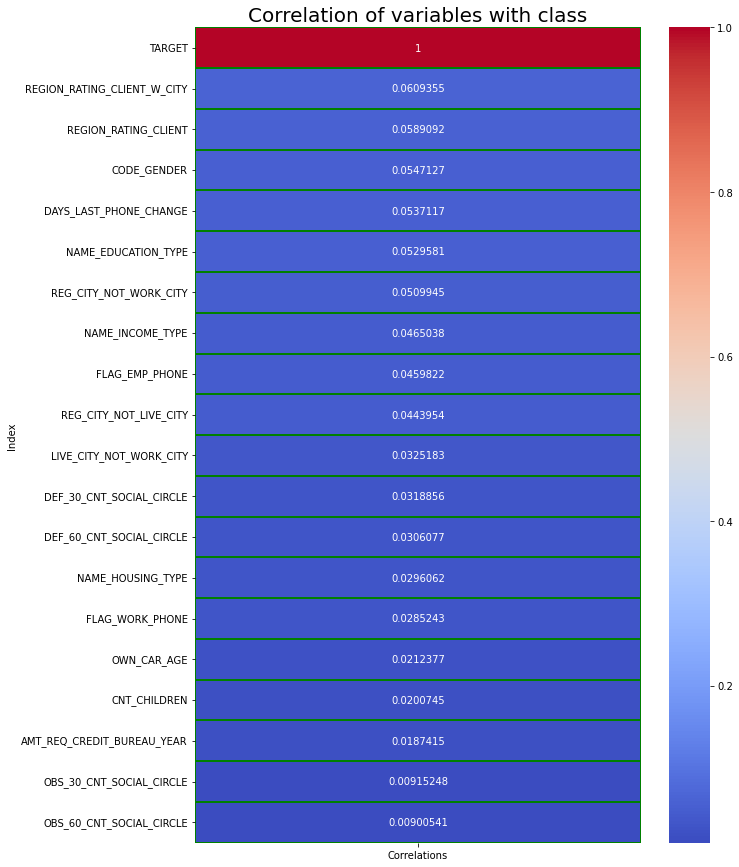

In [90]:
corr = df_copy.corrwith(df_copy['TARGET'], method='spearman').reset_index()

corr.columns = ['Index', 'Correlations']
corr = corr.set_index('Index')
corr = corr.sort_values(by=['Correlations'], ascending=False).head(20)

plt.figure(figsize=(10,15))
fig = seaborn.heatmap(corr, annot=True, fmt='g', cmap='coolwarm', linewidths=0.4, linecolor='green')

plt.title('Correlation of variables with class', fontsize=20)
plt.show()
del df_copy

## Checking for skewed data

In [56]:
outcomes = data_frame_copy['TARGET'].value_counts()
print('Fraudulent transactions: ' + str(outcomes[0]).rjust(10)
 + '\nNon-fraudulent transactions: ' + str(outcomes[1]))

Fraudulent transactions:     282686
Non-fraudulent transactions: 24825


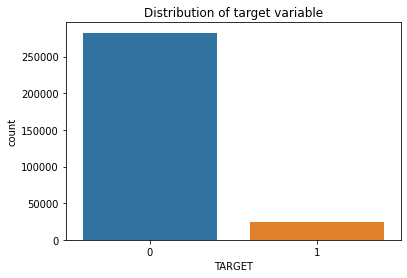

In [57]:
seaborn.countplot(data_frame_copy['TARGET'])
plt.title('Distribution of target variable')
plt.show()

# Machine Learning Pipeline: Selecting and training the model

In [58]:
# Use the encoder to convert columns/features that contain objects such as strings to integers
# This way the ML model will have an easy time reading the data
# I could not run this code within a loop because it hangs, so these lines of code are executed 1 by 1 instead.
label_encoder = LabelEncoder()
data_frame_copy['NAME_CONTRACT_TYPE'] = label_encoder.fit_transform(data_frame_copy['NAME_CONTRACT_TYPE'])
data_frame_copy['CODE_GENDER'] = label_encoder.fit_transform(data_frame_copy['CODE_GENDER'])
data_frame_copy['FLAG_OWN_CAR'] = label_encoder.fit_transform(data_frame_copy['FLAG_OWN_CAR'])
data_frame_copy['FLAG_OWN_REALTY'] = label_encoder.fit_transform(data_frame_copy['FLAG_OWN_REALTY']) 
data_frame_copy['NAME_TYPE_SUITE'] = label_encoder.fit_transform(data_frame_copy['NAME_TYPE_SUITE'].astype(str))
data_frame_copy['NAME_INCOME_TYPE'] = label_encoder.fit_transform(data_frame_copy['NAME_INCOME_TYPE'])
data_frame_copy['NAME_EDUCATION_TYPE'] = label_encoder.fit_transform(data_frame_copy['NAME_EDUCATION_TYPE'])
data_frame_copy['NAME_FAMILY_STATUS'] = label_encoder.fit_transform(data_frame_copy['NAME_FAMILY_STATUS'])
data_frame_copy['NAME_HOUSING_TYPE'] = label_encoder.fit_transform(data_frame_copy['NAME_HOUSING_TYPE'])
data_frame_copy['OCCUPATION_TYPE'] = label_encoder.fit_transform(data_frame_copy['OCCUPATION_TYPE'].astype(str))
data_frame_copy['WEEKDAY_APPR_PROCESS_START'] = label_encoder.fit_transform(data_frame_copy['WEEKDAY_APPR_PROCESS_START'])
data_frame_copy['ORGANIZATION_TYPE'] = label_encoder.fit_transform(data_frame_copy['ORGANIZATION_TYPE'].astype(str))
data_frame_copy['FONDKAPREMONT_MODE'] = label_encoder.fit_transform(data_frame_copy['FONDKAPREMONT_MODE'].astype(str))
data_frame_copy['HOUSETYPE_MODE'] = label_encoder.fit_transform(data_frame_copy['HOUSETYPE_MODE'].astype(str))
data_frame_copy['WALLSMATERIAL_MODE'] = label_encoder.fit_transform(data_frame_copy['WALLSMATERIAL_MODE'].astype(str))
data_frame_copy['EMERGENCYSTATE_MODE'] = label_encoder.fit_transform(data_frame_copy['EMERGENCYSTATE_MODE'].astype(str))

## Partitioning the data table for model training and testing

In [59]:
X = data_frame_copy.loc[:, data_frame_copy.columns != 'TARGET'] # input columns
Y = data_frame_copy['TARGET'] # output columns

seed = 101
validation_size = 0.2
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [60]:
print(f'Rows used to train the data (should be {100.0 - validation_size * 100}% of the total rows): {len(X_train)}')
print(f'Rows used to test the model (should be {validation_size * 100}% of the total rows): {len(X_test)}')

Rows used to train the data (should be 80.0% of the total rows): 246008
Rows used to test the model (should be 20.0% of the total rows): 61503


## Training models with different classification algorithms

The algorithms that will be tested for viability are:
- Naive Bayes
- K-Nearest Neighbors
- Logistic Regression
- Decision Tree Classifier
- Random Forest Classifier
- Linear Discriminant Analysis
- Support Vector Machines

In [61]:
class TrainedModel:
    '''
    Trained Machine Learning model.
    
    Parameters:
        name (str): Name of the ML model
        algorithm (Object): 
            ML algorithm used to train the TrainedModel
            See sklearn documentation: https://scikit-learn.org/stable/modules/classes.html
        
    Attributes:
        name (str): Name of the ML model
        testing_accuracy (float): 
            The rate of correct predictions over the total number of predictions.
        algorithm (Object): 
            ML algorithm used to train the TrainedModel.   
        prediction (int array):
            Array of predicted outcomes.
            Each predicted outcome is encoded depending on the kind of classification model.
            For example, A Binary Classification model will have a prediction array ranging from 0 to 1.
        trainingtime (int): 
            Time (in seconds) taken to train the ML model
    '''
    def __init__(self, name='', algorithm=None):
        self.name = name
        self.testing_accuracy = 0.0
        self.algorithm = algorithm
        self.prediction = []
        self.trainingtime = 0

class TrainedGaussianNB(TrainedModel):
    def __init__(self):
        super().__init__(name='Naive Bayes', algorithm=GaussianNB())

class TrainedKNeighborsClassifier(TrainedModel):
    def __init__(self):
        super().__init__(name='K-Nearest Neighbors', algorithm=KNeighborsClassifier())

class TrainedLogisticRegression(TrainedModel):
    def __init__(self):
        super().__init__(name='Logistic Regression', algorithm=LogisticRegression())

class TrainedDecisionTreeClassifier(TrainedModel):
    def __init__(self):
        super().__init__(name='Decision Tree Classifier', algorithm=DecisionTreeClassifier())

class TrainedRandomForestClassifier(TrainedModel):
    def __init__(self):
        super().__init__(name='Random Forest Classifier', algorithm=RandomForestClassifier())

class TrainedLinearDiscriminantAnalysis(TrainedModel):
    def __init__(self):
        super().__init__(name='Linear Discriminant Analysis', algorithm=LinearDiscriminantAnalysis())

class TrainedSVM(TrainedModel):
    def __init__(self):
        super().__init__(name='Support Vector Machines', algorithm=svm.SVC())

### Naive Bayes

In [62]:
naive_bayes = TrainedGaussianNB()
start = int(time.time())
naive_bayes.algorithm.fit(X_train, Y_train) # Train the model with the training data and the predicted outcomes (80% of total rows)
elapsed = int(time.time()) - start
naive_bayes.trainingtime = elapsed
naive_bayes.prediction = naive_bayes.algorithm.predict(X_test) # Use the test data (20% of total rows) to predict outcomes (fraud or not fraud)

naive_bayes.testing_accuracy = round(accuracy_score(Y_test, naive_bayes.prediction) * 100, 2)
print_model_statistics(naive_bayes)

Naive Bayes accuracy score: 91.4
Training time: 0m0s


### K-Nearest Neighbors

In [63]:
k_nearest_neighbors = TrainedKNeighborsClassifier()
start = int(time.time())
k_nearest_neighbors.algorithm.fit(X_train, Y_train)
elapsed = int(time.time()) - start
k_nearest_neighbors.trainingtime = elapsed
k_nearest_neighbors.prediction = k_nearest_neighbors.algorithm.predict(X_test)

k_nearest_neighbors.testing_accuracy = round(accuracy_score(Y_test, k_nearest_neighbors.prediction) * 100, 2)
print_model_statistics(k_nearest_neighbors)

K-Nearest Neighbors accuracy score: 91.53
Training time: 0m0s


### Logistic regression

Works Cited: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3936971/

In [64]:
logistic_regression = TrainedLogisticRegression()
start = int(time.time())
logistic_regression.algorithm.fit(X_train, Y_train)
elapsed = int(time.time()) - start
logistic_regression.trainingtime = elapsed
logistic_regression.prediction = logistic_regression.algorithm.predict(X_test)

logistic_regression.testing_accuracy = round(accuracy_score(Y_test, logistic_regression.prediction) * 100, 2)
print_model_statistics(logistic_regression)

Logistic Regression accuracy score: 92.05
Training time: 0m7s


### Decision Tree Classifier

In [65]:
decision_tree_classifier = TrainedDecisionTreeClassifier()
start = int(time.time())
decision_tree_classifier.algorithm.fit(X_train, Y_train)
elapsed = int(time.time()) - start
decision_tree_classifier.trainingtime = elapsed
decision_tree_classifier.prediction = decision_tree_classifier.algorithm.predict(X_test)

decision_tree_classifier.testing_accuracy = round(accuracy_score(Y_test, decision_tree_classifier.prediction) * 100, 2)
print_model_statistics(decision_tree_classifier)

Decision Tree Classifier accuracy score: 85.14
Training time: 0m35s


### Random Forest

In [66]:
random_forest = TrainedRandomForestClassifier()
start = int(time.time())
random_forest.algorithm.fit(X_train, Y_train)
elapsed = int(time.time()) - start
random_forest.trainingtime = elapsed
random_forest.prediction = random_forest.algorithm.predict(X_test)

random_forest.testing_accuracy = round(accuracy_score(Y_test, random_forest.prediction) * 100, 2)
print_model_statistics(random_forest)

Random Forest Classifier accuracy score: 92.05
Training time: 3m20s


### Linear Discriminant Analysis

In [67]:
linear_discriminant_analysis = TrainedLinearDiscriminantAnalysis()
start = int(time.time())
linear_discriminant_analysis.algorithm.fit(X_train, Y_train)
elapsed = int(time.time()) - start
linear_discriminant_analysis.trainingtime = elapsed
linear_discriminant_analysis.prediction = linear_discriminant_analysis.algorithm.predict(X_test)

linear_discriminant_analysis.testing_accuracy = round(accuracy_score(Y_test, linear_discriminant_analysis.prediction) * 100, 2)
print_model_statistics(linear_discriminant_analysis)

Linear Discriminant Analysis accuracy score: 92.01
Training time: 0m6s


### Support Vector Machines

In [68]:
support_vector_machines = TrainedSVM()
start = int(time.time())
support_vector_machines.algorithm.fit(X_train, Y_train)
elapsed = int(time.time()) - start
support_vector_machines.trainingtime = elapsed
support_vector_machines.prediction = support_vector_machines.algorithm.predict(X_test)

support_vector_machines.testing_accuracy = round(accuracy_score(Y_test, support_vector_machines.prediction) * 100, 2)
print_model_statistics(support_vector_machines)

Support Vector Machines accuracy score: 92.05
Training time: 18m29s


# Machine Learning Pipeline: Evaluating each model

In [69]:
models = [
    naive_bayes,
    k_nearest_neighbors,
    logistic_regression,
    decision_tree_classifier,
    random_forest,
    linear_discriminant_analysis,
    support_vector_machines
]

In [70]:
model_scoring = pd.DataFrame({
    'Model': [
        naive_bayes.name,
        k_nearest_neighbors.name,
        logistic_regression.name,
        decision_tree_classifier.name,
        random_forest.name,
        linear_discriminant_analysis.name,
        support_vector_machines.name
    ],
    'Accuracy': [
        naive_bayes.testing_accuracy,
        k_nearest_neighbors.testing_accuracy,
        logistic_regression.testing_accuracy,
        decision_tree_classifier.testing_accuracy,
        random_forest.testing_accuracy,
        linear_discriminant_analysis.testing_accuracy,
        support_vector_machines.testing_accuracy
    ],
    'Time': [
        naive_bayes.trainingtime,
        k_nearest_neighbors.trainingtime,
        logistic_regression.trainingtime,
        decision_tree_classifier.trainingtime,
        random_forest.trainingtime,
        linear_discriminant_analysis.trainingtime,
        support_vector_machines.trainingtime
    ]
})

In [71]:
model_scoring.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Time
2,Logistic Regression,92.05,7
4,Random Forest Classifier,92.05,200
6,Support Vector Machines,92.05,1109
5,Linear Discriminant Analysis,92.01,6
1,K-Nearest Neighbors,91.53,0
0,Naive Bayes,91.40,0
3,Decision Tree Classifier,85.14,35


### Choosing the model

In [72]:
def most_efficient_model(models__):
    most_accurate = None
    length = len(models__)
    if length > 0:
        if length == 1:
            return models__[0]
        most_accurate = models__[0]
        for i in range(1, length):
            if models[i].testing_accuracy > most_accurate.testing_accuracy:
                most_accurate = models[i]
    return most_accurate

def print_most_efficient_model(model__):
    ret = 'Most efficient model:\n' + model__.name + '\n- Accuracy score: ' + str(best.testing_accuracy) + '\n- Training time: ' + str(best.trainingtime)
    print(ret)

best = most_efficient_model(models)
print_most_efficient_model(best)
model, prediction = best.algorithm, best.prediction

Most efficient model:
Logistic Regression
- Accuracy score: 92.05
- Training time: 7


# Model Evaluation

## Data Visualization after model creation

True positive
- Reality: Fraudulent transaction would happen
- Model predicted: Fraudulent transaction would happen
- Outcome: Fraud detected successfully - crisis averted!

False positive
- Reality: Not a fraudulent transaction
- Model predicted: Fraudulent transaction would happen
- Outcome: 

False negative
- Reality: Fraudulent transaction occurred
- Model predicted: Not a fraudulent transaction
- Outcome: Card was compromised but not identified

True negative
- Reality: Not a fraudulent transaction
- Model predicted: Not a fraudulent transaction
- Outcome: Just a normal situation, nothing to see here!

In [73]:
def print_confusion_matrix_stats(cm):
    '''
    Print the number of true positives, true negatives, false positives, and false negatives.
        Parameters:
            cm (ndarray): Confusion matrix. For more about confusion matrices: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix
    '''
    tp = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tn = cm[1][1]
    print('True positives: ' + str(tp).rjust(10))
    print('False positives: ' + str(fp).rjust(9))
    print('False negatives: ' + str(fn).rjust(9))
    print('True negatives: ' + str(tn).rjust(10))

def print_confusion_matrix_diagram(cm):
    '''
    Print a confusion matrix diagram, provided with a confusion matrix.
    The confusion matrix is constructed with the dataset's outcomes (Y_test) and a trained ML model's predictions.
        Parameters:
            cm (ndarray): Confusion matrix. For more about confusion matrices: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix
    '''
    seaborn.heatmap(cm, annot=True, fmt='g')

True positives:      56612
False positives:         0
False negatives:      4891
True negatives:          0


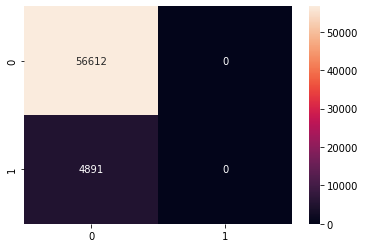

In [74]:
confusion_matrix_diagram = confusion_matrix(Y_test, prediction)
print_confusion_matrix_diagram(confusion_matrix_diagram)
print_confusion_matrix_stats(confusion_matrix_diagram)

## Optimizing the data

In [75]:
fraud, nonfraud = data_frame_copy['TARGET'].value_counts()
print(f'Fraudulent transactions: ' + str(fraud).rjust(10) + '\nNon-fraudulent transactions: ' + str(nonfraud))
if fraud > nonfraud:
    print(f'There are ~{(fraud/nonfraud):.4g}x more fraudulent transactions than non-fraudulent transactions.')
else:
    print(f'There are ~{(nonfraud/fraud):.4g}x more fraudulent transactions than non-fraudulent transactions.')

Fraudulent transactions:     282686
Non-fraudulent transactions: 24825
There are ~11.39x more fraudulent transactions than non-fraudulent transactions.


In [76]:
print('Before oversampling:', Counter(Y_train))
oversampled = RandomOverSampler(sampling_strategy='minority')
X_train_oversampled, Y_train_oversampled = oversampled.fit_resample(X_train, Y_train)
print('After oversampling:', Counter(Y_train_oversampled))

Before oversampling: Counter({0: 226074, 1: 19934})
After oversampling: Counter({1: 226074, 0: 226074})


In [77]:
lr_oversampled = TrainedLogisticRegression()
start = int(time.time())
lr_oversampled.algorithm.fit(X_train_oversampled, Y_train_oversampled)
elapsed = int(time.time()) - start
lr_oversampled.trainingtime = elapsed
lr_oversampled.prediction = lr_oversampled.algorithm.predict(X_test)

lr_oversampled.testing_accuracy = round(accuracy_score(Y_test, lr_oversampled.prediction) * 100, 2)
print_model_statistics(lr_oversampled)

Logistic Regression accuracy score: 58.0
Training time: 0m11s


Works Cited:\
https://medium.com/dataman-in-ai/sampling-techniques-for-extremely-imbalanced-data-part-ii-over-sampling-d61b43bc4879

In [78]:
print('Before SMOTE:', Counter(Y_train))
smoted = SMOTE(sampling_strategy='minority')
X_train_smoted, Y_train_smoted = smoted.fit_resample(X_train, Y_train)
print('After SMOTE:', Counter(Y_train_smoted))

Before SMOTE: Counter({0: 226074, 1: 19934})
After SMOTE: Counter({1: 226074, 0: 226074})


In [79]:
lr_smoted = TrainedLogisticRegression()
start = int(time.time())
lr_smoted.algorithm.fit(X_train_smoted, Y_train_smoted)
elapsed = int(time.time()) - start
lr_smoted.trainingtime = elapsed
lr_smoted.prediction = lr_smoted.algorithm.predict(X_test)

lr_smoted.testing_accuracy = round(accuracy_score(Y_test, lr_smoted.prediction) * 100, 2)
print_model_statistics(lr_smoted)

Logistic Regression accuracy score: 59.88
Training time: 0m11s


# Conclusion

In [80]:
functions.print_column_description('AMT_CREDIT')
functions.print_column_description('AMT_GOODS_PRICE')
functions.print_column_description('AMT_ANNUITY')
functions.print_column_description('REGION_RATING_CLIENT_W_CITY')
functions.print_column_description('REGION_RATING_CLIENT')
functions.print_column_description('CNT_CHILDREN')
functions.print_column_description('CNT_FAM_MEMBERS')

AMT_CREDIT:
Credit amount of the loan

AMT_GOODS_PRICE:
For consumer loans it is the price of the goods for which the loan is given

AMT_ANNUITY:
Loan annuity

REGION_RATING_CLIENT_W_CITY:
Our rating of the region where client lives with taking city into account (1,2,3)

REGION_RATING_CLIENT:
Our rating of the region where client lives (1,2,3)

CNT_CHILDREN:
Number of children the client has

CNT_FAM_MEMBERS:
How many family members does client have



# References

Credit card fraud detection data set
<br/>
https://www.kaggle.com/mishra5001/credit-card
<br/>
<br/>
Imbalanced data classification
<br/>
https://www.analyticsvidhya.com/blog/2017/03/imbalanced-data-classification/
<br/>
<br/>
Logistic Regression
<br/>
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3936971/
<br/>
<br/>
Logistic Regression on imbalanced data
<br/>
https://machinelearningmastery.com/cost-sensitive-logistic-regression/
<br/>
<br/>
Machine Learning model accuracy
<br/>
https://developers.google.com/machine-learning/crash-course/classification/accuracy
<br/>
<br/>
Seaborn Correlation Heatmap Creation
<br/>
https://heartbeat.comet.ml/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07